## CBA / DMG2 / Supervised Learning Homework Assignment - 2


Submitted By: <b>Amit Kumar Sharma (PGID: 71721079)<b>

### Problem 1 – Pair-Wise Classifier Features

    •	For all pairs of classes in MNIST data
    •	Compute the Fisher Discriminant for that pair of classes
    •	This is again a D dimensional vector where each dimension corresponds to a pixel. 
    •	Convert the D-dimensional vector into an image – scale it and draw the image
    •	Comment on how Fisher discriminant for a few pairs of classes is learning to “focus” on different pixels in the image.

In [1]:
import os
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
import graphviz
from anytree import Node, RenderTree
%matplotlib inline

In [2]:
train = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/train'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = str(i)
    if i == 0:
        train = temp
    else:
        train = pd.concat([train, temp],ignore_index=True)

In [3]:
test = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/test'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = str(i)
    if i == 0:
        test = temp
    else:
        test = pd.concat([test, temp],ignore_index=True)

In [4]:
train.apply(lambda x: sum(x.isnull()))

V1       391
V2       391
V3       391
V4       391
V5       391
V6       391
V7       391
V8       391
V9       391
V10      391
V11      391
V12      391
V13      391
V14      391
V15      391
V16      391
V17      391
V18      391
V19      391
V20      391
V21      391
V22      391
V23      391
V24      391
V25      391
V26      391
V27      391
V28      391
V29      391
V30      391
        ... 
V756     391
V757     391
V758     391
V759     391
V760     391
V761     391
V762     391
V763     391
V764     391
V765     391
V766     391
V767     391
V768     391
V769     391
V770     391
V771     391
V772     391
V773     391
V774     391
V775     391
V776     391
V777     391
V778     391
V779     391
V780     391
V781     391
V782     391
V783     391
V784     391
label      0
Length: 785, dtype: int64

In [5]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35750 entries, 0 to 36140
Columns: 785 entries, V1 to label
dtypes: float64(784), object(1)
memory usage: 214.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24250 entries, 0 to 24518
Columns: 785 entries, V1 to label
dtypes: float64(784), object(1)
memory usage: 145.4+ MB


In [8]:
train.iloc[:,0:784].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train['label'] = train['label'].astype('category')
test['label'] = test['label'].astype('category')

##### For all pairs of classes in MNIST data, Compute the Fisher Discriminant for that pair of classes

###### Compute Fisher Discriminant for class 0 and class 1 pair

In [10]:
i = 0
j = 1
fisherDiscriment = []

train1 = train[(train['label']==str(i)) | (train['label']==str(j))]
class1Means = train1.loc[train1['label']==str(i)].iloc[:,0:784].mean()
class2Means = train1.loc[train1['label']==str(j)].iloc[:,0:784].mean()

class1Var = train1.loc[train1['label']==str(i)].iloc[:,0:784].var()
class2Var = train1.loc[train1['label']==str(j)].iloc[:,0:784].var()

n1 = train1.loc[train1['label']==str(i)].shape[0]
n2 = train1.loc[train1['label']==str(j)].shape[0]
#(class1Means - class2Means)**2/(n1*class1Var + n2*class2Var)

for k in range(0,class1Means.shape[0]):
    if class1Var[k] == 0 and  class2Var[k] == 0:
        fisherDiscriment.append(0)
    else:
        fisherDiscriment.append((class1Means[k] - class2Means[k])**2/(n1*class1Var[k] + n2*class2Var[k]))
        
fisherDiscriment1 = np.array(fisherDiscriment)
fisherDiscriment1 = np.reshape(fisherDiscriment1, (1,784))
fisherDiscriment1.shape

(1, 784)

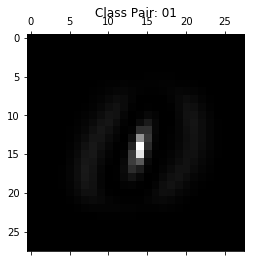

In [11]:
col_names = [ 'V'+str(i) for i in range(train.iloc[:,0:784].shape[1]) ]
plt.gray()
fig = plt.figure( figsize=(4,4) )

ax = fig.add_subplot(1,1,1, title='Class Pair: ' + str("01") )
ax.matshow(fisherDiscriment1.reshape((28,28)).astype(float))
plt.show()

##### Compute Fisher Discriminant for all class pairs

In [12]:
fisherDiscriment = []
classLevel = []
for i in range(0,10,1):
    for j in range(0, 10, 1):
        if i < j:
            temp = []
            train1 = train[(train['label']==str(i)) | (train['label']==str(j))]
            class1Means = train1.loc[train1['label']==str(i)].iloc[:,0:784].mean()
            class2Means = train1.loc[train1['label']==str(j)].iloc[:,0:784].mean()

            class1Var = train1.loc[train1['label']==str(i)].iloc[:,0:784].var()
            class2Var = train1.loc[train1['label']==str(j)].iloc[:,0:784].var()

            n1 = train1.loc[train1['label']==str(i)].shape[0]
            n2 = train1.loc[train1['label']==str(j)].shape[0]
            #(class1Means - class2Means)**2/(n1*class1Var + n2*class2Var)

            for k in range(0,class1Means.shape[0]):
                if class1Var[k] == 0 and  class2Var[k] == 0:
                    temp.append(0)
                else:
                    temp.append((class1Means[k] - class2Means[k])**2/(n1*class1Var[k] + n2*class2Var[k]))
            fisherDiscriment.append(temp)
            classLevel.append(str(i)+str(j))
            
            
fisherDiscriment1 = np.array(fisherDiscriment)
fisherDiscriment1 = np.reshape(fisherDiscriment1, (len(fisherDiscriment),784))
fisherDiscriment1.shape

(45, 784)

##### This is again a D dimensional vector where each dimension corresponds to a pixel. Convert the D-dimensional vector into an image – scale it and draw the image

##### Converting first pair (0 and 1 class) Fisher Discriminant into image

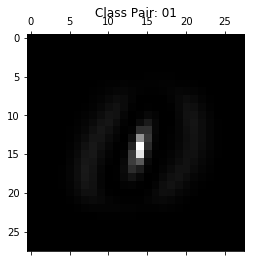

In [13]:
col_names = [ 'V'+str(i) for i in range(fisherDiscriment1.shape[1]) ]
plt.gray()
fig = plt.figure( figsize=(4,4) )

ax = fig.add_subplot(1,1,1, title='Class Pair: ' + classLevel[0] )
ax.matshow(fisherDiscriment1[0].reshape((28,28)).astype(float))
plt.show()

##### Convert D-dimensional vector into images

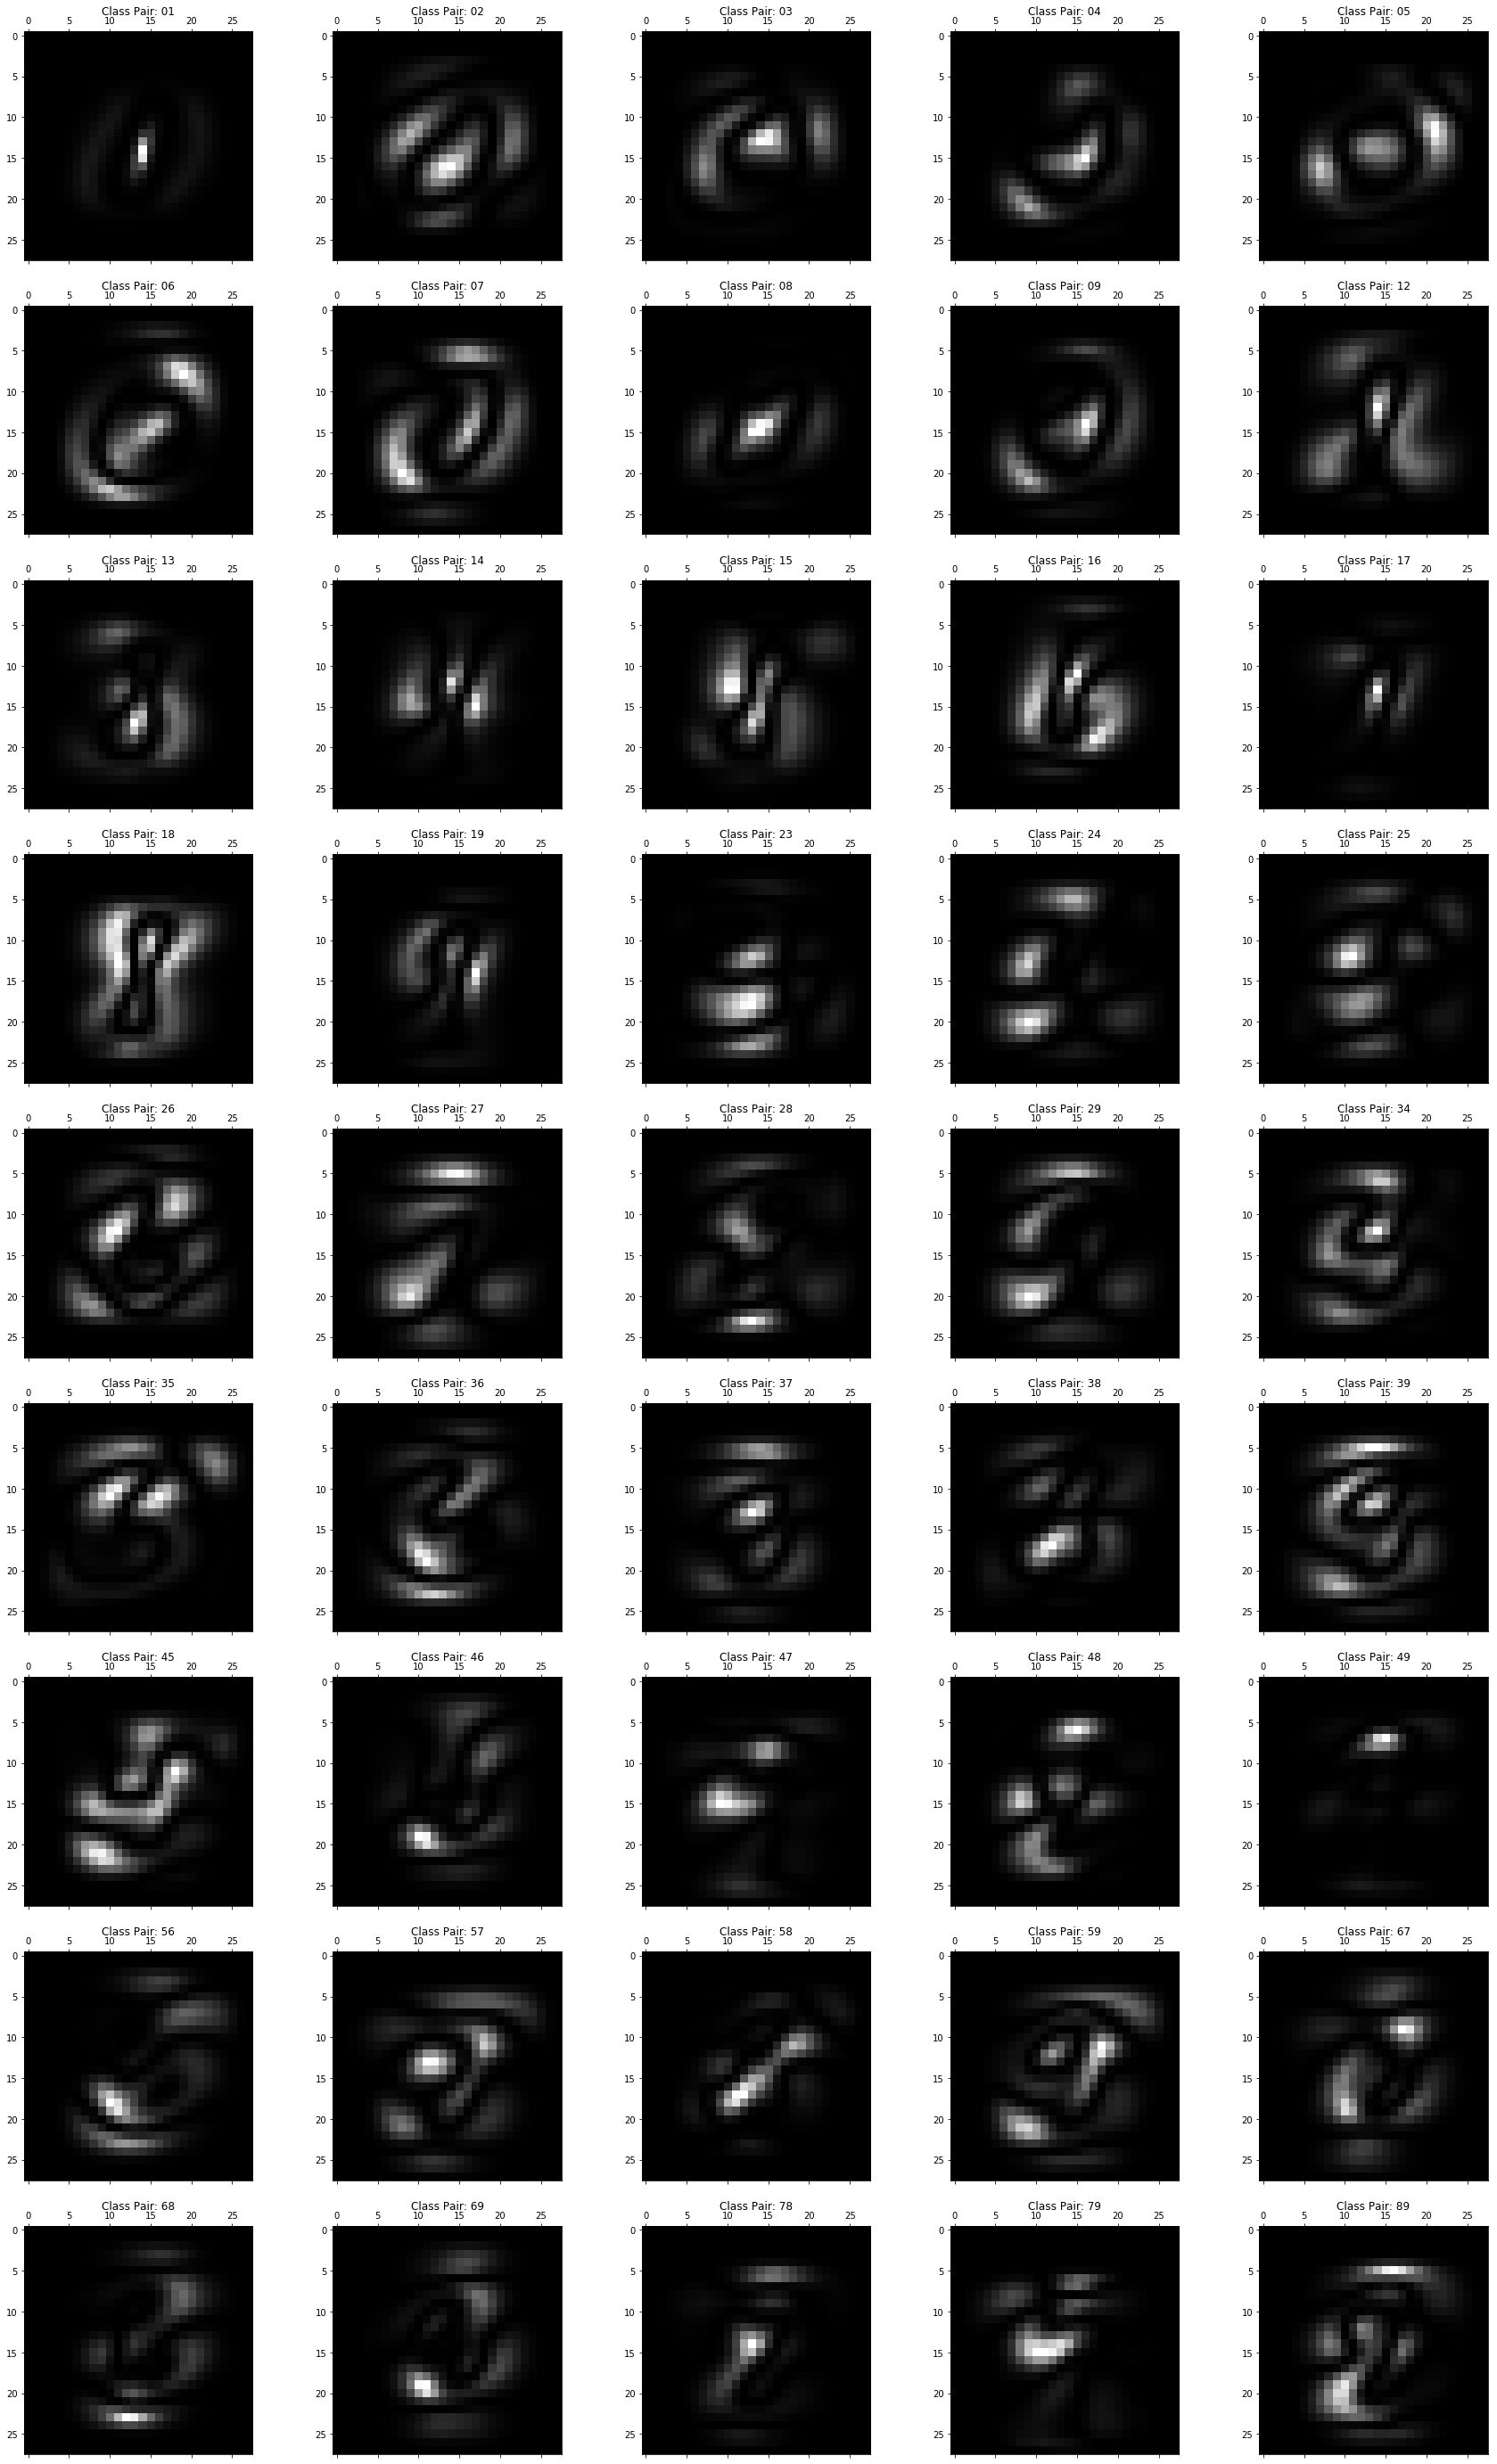

In [14]:
plt.gray()
fig = plt.figure( figsize=(30,50) )
for i in range(0,fisherDiscriment1.shape[0]):
    ax = fig.add_subplot(9,5,i+1, title='Class Pair: ' + classLevel[i] )
    ax.matshow(fisherDiscriment1[i].reshape((28,28)).astype(float))

plt.show()

##### Comment on how Fisher discriminant for a few pairs of classes is learning to “focus” on different pixels in the image.

We can see in above images that there is some patterns for each pair. 

e.g. we can see that in 0-1 pair image, Fisher discriminant trying to learn pixels of both 0 and 1 class.

we can see that in 1-8 pair image, Fisher discriminant trying to learn pixels of both 1 and 8 class.

we are not able to see any pattern in 4-9 pair image.

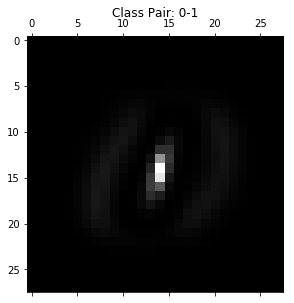

In [15]:
plt.gray()
fig = plt.figure( figsize=(30,50) )
ax = fig.add_subplot(9,5,i+1, title='Class Pair: 0-1' )
ax.matshow(fisherDiscriment1[0].reshape((28,28)).astype(float))
plt.show()

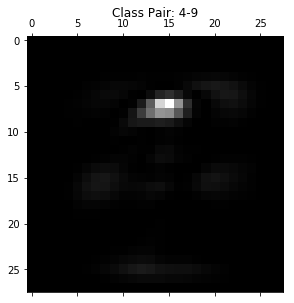

In [16]:
plt.gray()
fig = plt.figure( figsize=(30,50) )
ax = fig.add_subplot(9,5,i+1, title='Class Pair: 4-9' )
ax.matshow(fisherDiscriment1[34].reshape((28,28)).astype(float))
plt.show()